<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "png"

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [138]:
df = pd.read_csv('https://firebasestorage.googleapis.com/v0/b/civic-abode-211408.appspot.com/o/dst-3.0_16_1_hh_database.csv?alt=media&token=620fdeca-e80e-4d0d-ac2e-96bddb6ab6df', sep=';')


2. Выведите несколько первых (последних строк таблицы), чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [139]:
hh_data = df.copy()
hh_data.head(3)
hh_data.tail(2)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице

In [140]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений

In [141]:
hh_data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 2014 Тюменский Государствен...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


5. Выведите основную статистическую информацию о столбцах.


In [142]:
print(hh_data['Опыт работы'].nunique())
hh_data['Ищет работу на должность:'].describe()

44413


count                       44744
unique                      14929
top       Системный администратор
freq                         3099
Name: Ищет работу на должность:, dtype: object

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [143]:
def get_edu_grade(edu):
    """
        Получение образования из признака
    Args:
        Делим строку на список и отбираем в edu_liые первые 2 слова, потом проверяемя 
        если в список попало слово Образование, то мы отбираем первое только слово. 
        Потом список из слов переводим в строку через метод .join
    Returns:
        возвращаем строку в виде (высшее, среднее специальное и т.д.)
    """
    edu_list = edu.split()[:2]
    if 'образование' in edu_list:
        edu_list = edu.split()[:1]
    education = ' '.join(edu_list)
    return education

hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(get_edu_grade)
hh_data = hh_data.drop('Образование и ВУЗ', axis=1)    

2. Теперь нас интересует столбец **"Пол/возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [144]:
def get_sex(arg):
    """
    Args:
        проверяем arg на наличие в нем мужчина или женщина и 
        возвращаем соответствующее значение М или Ж
    Returns:
        возвращаем тип пола в виде строки в gender
    """
    if 'Мужчина' in arg:
        gender = 'M'
    else: 
        gender = 'Ж'
    return gender

def get_age(arg):
    """[summary]
    Разделяем строку в arg на список и с помощью среза получаем возвраст. 
    Переводим возраст в формат int  и возвращаем значение. 
    """
    return int(arg.split(' , ')[1][1:3])


hh_data['Пол'] = hh_data['Пол, возраст'].apply(get_sex)
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(get_age)
hh_data = hh_data.drop('Пол, возраст', axis=1)

round(hh_data['Возраст'].mean(), 1)
hh_data['Пол'].value_counts(normalize=True)
    

M    0.809293
Ж    0.190707
Name: Пол, dtype: float64

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-третьих, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [145]:
def get_experience(x):
    """Получение опыта и преобразование в месяц
    Args:
         создаем переменные со списком склоненных слов месяц(а, ев) и год(а) (лет),
         проверяем если ячейка пустая nan или "не указано" - возвращаем None
         заносиме в переменну. arg_splited разделенную строку со срезом опыта.
         Проверяем через цикл каждое слово переменной arg_split на вхождение в переменные с годами и словами. 
         Если есть вхождение мы предыдущее значенив в arg_splited заносим в переменну. month или year.
    Returns:
        int - сумма месяцев с годами * на 12 месяцев
    """
    month_list = ['месяц', 'месяцев', 'месяца']
    year_list = ['год', 'лет', 'года']
    month = 0
    year = 0
    if pd.isna(x) or x == 'Не указано':
        return None
    else: 
        arg_splited = x.split(' ')[2:6]
        for i in range(len(arg_splited)):
            if arg_splited[i] in month_list:
                month = int(arg_splited[i-1])
            if arg_splited[i] in year_list:
                year = int(arg_splited[i-1])
        
    return int(month + (year * 12))

hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(get_experience)
hh_data['Опыт работы (месяц)']
hh_data = hh_data.drop('Опыт работы', axis=1)
hh_data['Опыт работы (месяц)'].median()


100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов миллионников:
    
   <code> million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    
    
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [146]:
def get_city(arg):
    """Получение Города из аргумента

    Args:
        million_cities (list): города, которые входят в группу милионников
        city_splited - разделяем строку и через срез получаем город. 
        В цикле проверяем город в million_cities, если есть то вносим в переменную city статус, 
        такой же принцип проверки с Москва и СПБ, если в первых двух не нашли, то относим к другим городам
    Returns:
        str: возвращает название города или группу городов
    """
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    city_splited = arg.split(' , ')[0]
    city = ''
    if city_splited in million_cities:
        city = 'город-миллионник'
    elif city_splited == 'Москва' or city_splited == 'Санкт-Петербург':
        city = city_splited
    else: 
        city = 'другие'
    return city

def get_status_relocation(arg):
    status_splited = arg.split(' , ')[-2]
    if 'не готов к переезду' in arg or 'не готова к переезду' in arg or 'не хочу переехать' in arg:
        return False
    else:
        return True
    
def get_status_trips(arg):
    status_splited = arg.split(' , ')[-1]
    if 'не готов' not in status_splited and 'командировка' in status_splited: 
        return True
    else: 
        return False


hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(get_city)
hh_data['Переезд'] = hh_data['Город, переезд, командировки'].apply(get_status_relocation)
hh_data['Командировки'] = hh_data['Город, переезд, командировки'].apply(get_status_trips)
hh_data = hh_data.drop('Город, переезд, командировки', axis=1) 

percent_of_relocation_trips = round(((hh_data[(hh_data['Переезд'] == True) & (hh_data['Командировки'] == True)].shape[0]) / (hh_data.shape[0])) * 100)
print(f'{percent_of_relocation_trips}% соискателей готовы одновременно и к переездам, и к командировкам')

32% соискателей готовы одновременно и к переездам, и к командировкам


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [147]:
employments = ['полная занятость', 'частичная занятость', 'проектная работа', 'стажировка', 'волонтерство']
schedules = ['гибкий график', 'полный день', 'сменный график', 'вахтовый метод', 'удаленная работа']

for employment, schedule in zip(employments, schedules):
    hh_data[employment] = hh_data['Занятость'].apply(lambda x: employment in x)
    hh_data[schedule] = hh_data['График'].apply(lambda x: schedule in x)


hh_data = hh_data.drop('Занятость', axis=1)
hh_data = hh_data.drop('График', axis=1)    

hh_data[(hh_data['проектная работа'] == True) & (hh_data['волонтерство'] == True)].shape
hh_data[(hh_data['вахтовый метод'] == True) & (hh_data['гибкий график'] == True)].shape

      

(2311, 23)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [148]:
def get_salary_num(arg):
    salary = float(arg.split(' ')[0])
    return salary

def get_salary_сurrency(arg):
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    curr = arg.split(' ')[1].replace('.', '')
    if curr == 'руб':
        return 'RUB'
    else:
        return currency_dict[curr]
    
rates = pd.read_csv('ExchangeRates.csv')
rates['date'] = pd.to_datetime(rates['date']).dt.date
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме']).dt.date
hh_data['ЗП (tmp)'] = hh_data['ЗП'].apply(get_salary_num)
hh_data['Курс (tmp)'] = hh_data['ЗП'].apply(get_salary_сurrency)

In [149]:
merged = hh_data.merge(
    rates, 
    left_on=['Курс (tmp)', 'Обновление резюме'],
    right_on=['currency', 'date',], 
    how='left'
)
merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)
hh_data['ЗП (руб)'] = merged['close'] * merged['ЗП (tmp)'] / merged['proportion']
merged = hh_data.drop(['ЗП', 'ЗП (tmp)', 'Курс (tmp)'], axis=1)
print(round(merged['ЗП (руб)'].median()/1000))

59


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

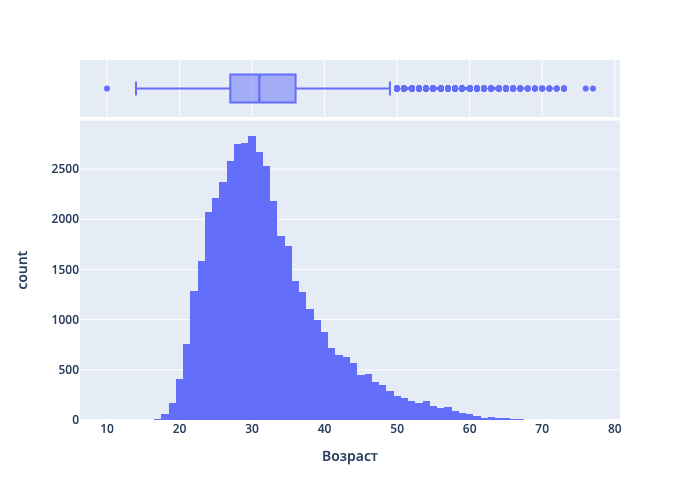

In [150]:
fig = px.histogram(
    data_frame=merged,
    x = 'Возраст',
    marginal = 'box',      
)
fig.show()



1. Мода распределения равна Возрасту в 30 лет. 
2. Предельные значения признака 14 и 55, а большинство соискателей находится в диапазоне от 27 до 36 лет. 
3. Аномалиями данного признака являются значения 10 с левой части графика и значения от 50 и выше вероятно тоже аномалии. Значения от 50 и до пенсионного возраста можно еще дополнительно исследовать для точного выявления, а те что выше 100% аномалии. 

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

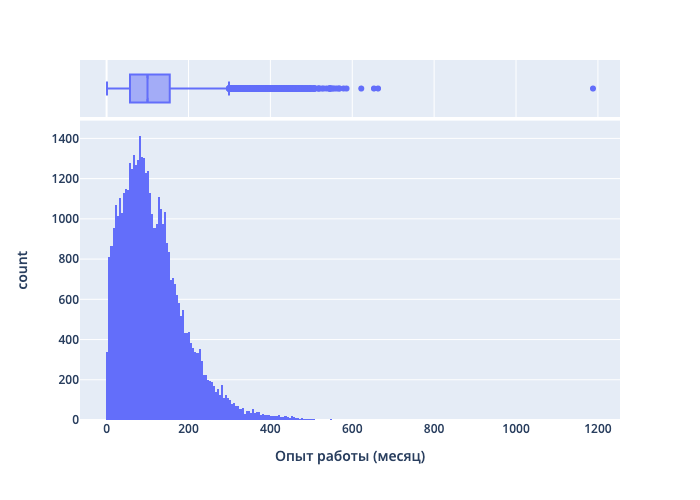

In [151]:
fig = px.histogram(
    data_frame=merged, 
    x = 'Опыт работы (месяц)',
    marginal = 'box'
)
fig.show()

1. Мода распределения равна 1414 соискателям с опытом работы в диапазоне 80-84 мес. 
2. Предельными значениями признакая являются 0 и 299 мес. Опыт работы большинства соискателей находится в диапазоне от 55 до 150 месяцев.
3. Значение в 1188 мес это точно аномалия, а также значения в диапазоне 300 и выше я бы тоже отнес к аномалиям, которые нуждаются в дополнительной перероверке и изучении данных. 


3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [152]:
merged['ЗП (руб)'].mode()

0    50000.0
dtype: float64

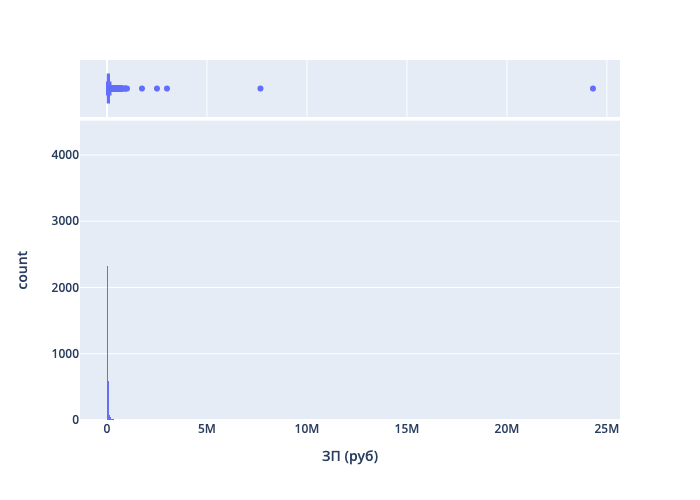

In [153]:
fig = px.histogram(
    data_frame=merged,
    x = 'ЗП (руб)',
    marginal='box'
)
fig.show()

1. Мода распределения равна 47500 - 52500 руб.
2. Предельными значениями признака являются значения от 0 до 180 тыс руб. Зар плата большинства соискателей находится в интервале от 37тыс. до 95тыс. руб. 
3. К аномалиям я бы причислил точно значения от 1млн и выше. а те что от 200тыс и до 1млн нужно дополнительно изучить и выявить где аномалии а где реальные данные. 

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

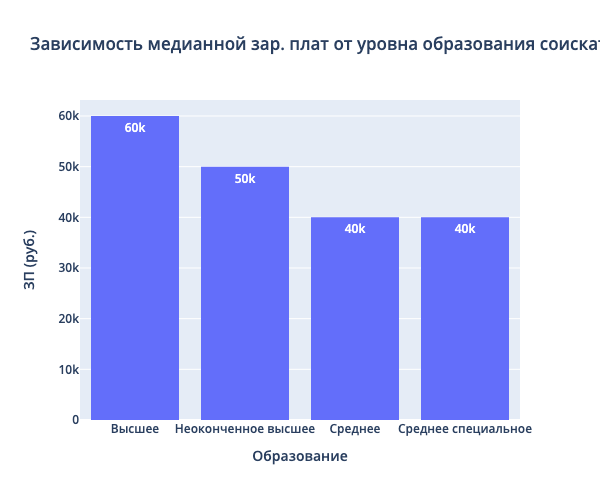

In [154]:
filtered = merged[merged['ЗП (руб)'] < 1e6]
hist_data = filtered.groupby('Образование', as_index=False)['ЗП (руб)'].median()
hist_data

fig = px.histogram(
    hist_data, 
    x = 'Образование',
    y = 'ЗП (руб)',
    width = 600,
    height = 500, 
    text_auto=True,
    title = 'Зависимость медианной зар. плат от уровна образования соискателей', 
    )
fig.update_layout( yaxis_title='ЗП (руб.)')
fig.show()

Для Высшее образование наблюдается наибольший уровень зар. плат, а для среднего и среднего (специального) наименьший уровень зар. плат. 

Признак уровня образования очень важен для прогнозирования зар плат. Как видим для высшего образования он на 30% выше чем для среднего, это существенная разница. 

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

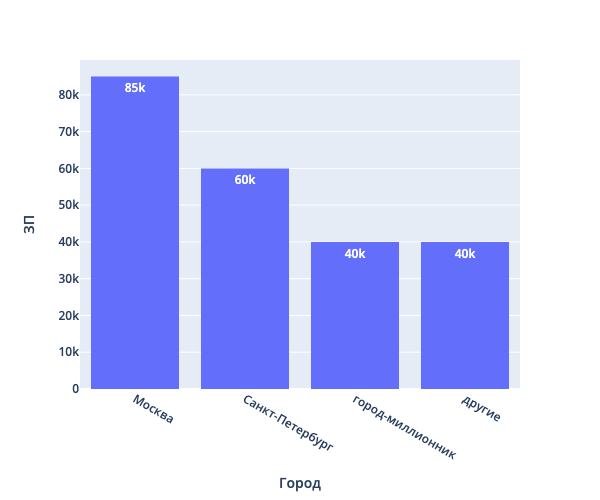

In [155]:
filtered = merged[merged['ЗП (руб)'] < 1e6]
city_data = filtered.groupby('Город', as_index=False)['ЗП (руб)'].median()

fig = px.histogram(
    city_data,
    x = 'Город',
    y = 'ЗП (руб)', 
    text_auto=True, 
    width = 600, 
    height = 500
)
fig.update_layout(yaxis_title = 'ЗП')
fig.show()

 Желаемые уровни зар плат в категории другие и город-миллионик находятся на одном уровне. А вот уже в Санкт-Петербурге уровень зарплат выше на 50% от городов-миллионников и другие. А в Москве уровень зарплат выше чуть более чем в 2 раза с 2мя последними категориями и на 30% выше чем в Санкт-Петербурге. 

 Признак города очень важен при прогнозировании зарабтной платы. 

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

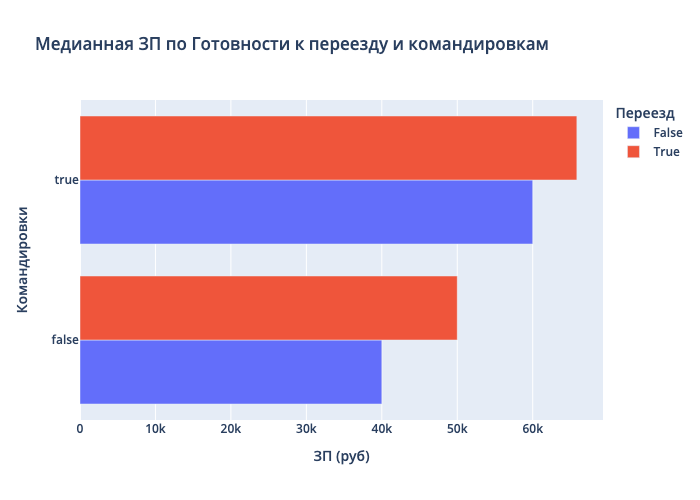

In [156]:
hist_data = merged.groupby(['Переезд', 'Командировки'], as_index=False)['ЗП (руб)'].median()
hist_data

fig = px.bar(
    hist_data, 
    x = 'ЗП (руб)', 
    y = 'Командировки', 
    barmode = 'group',
    color = 'Переезд', 
    orientation='h',
    title = 'Медианная ЗП по Готовности к переезду и командировкам', 
)
fig.show()

Из данного графика мы видим, что больше всего уровень ЗП когда соискатель готов к командировкам, особенно к командировавкам и переезду. Уровень ЗП у соискателей готовых к командировкам и переезду одновременно больше на 50% чем у тех кто не готов ни к первому ни второму. 

7. Постройте сводную таблицу, иллюстрирующую зависимость медианной желаемой заработной платы от возраста («Возраст») и образования  
(«Образование»).
По полученной сводной таблице постройте тепловую карту.
Проанализируйте тепловую карту, сравнив показатели внутри групп.

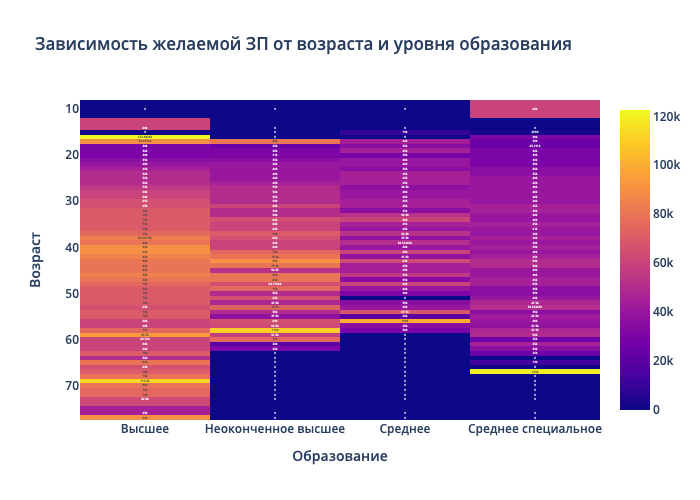

In [157]:
pivot_data = merged.pivot_table(
    values = 'ЗП (руб)', 
    index = 'Возраст',
    columns = 'Образование',
    aggfunc = 'median',
    fill_value=0,  
) 
fig = px.imshow(pivot_data, text_auto=True, title = 'Зависимость желаемой ЗП от возраста и уровня образования')
fig.show()


Из данной тепловой карты мы выдим, что самый стремительный рост ЗП наблюдается у соискателей с высшим уровнем образования. Менее всего у среднего. Можем преположить также из графика что с возрастом люди (от 50 лет) у которых есть только среднее образование работают неофициально, поэтому статистика по ЗП у них стремится к 0. 

Также на карте мы можем увидеть потенциальные выбросы и аномалии в значенияз ЗП: В категории среднее специальное мы видим очень странный показатель ЗП в 60к руб в возрасте 10 лет, и тоже самое в высшем образовании. Здесь скорее можно предположить, соискатели по ошибке выставили такую ЗП или у них завышенны требования для своего возраста и уровня образования. 

Также мы можем увидеть что в категории высшее и неоконеченно высшее до 25 лет уровень роста ЗП примерно одинаковый, далее конечно наблюдается стремительный рост у сосикателей из высшим образованием. 

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [158]:
scatter_data = merged.copy()
scatter_data['Опыт работы (год)'] = scatter_data['Опыт работы (месяц)'] /12
scatter_data.head(2)

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,полный день,проектная работа,сменный график,стажировка,вахтовый метод,волонтерство,удаленная работа,ЗП (руб),Опыт работы (год)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,Неоконченное высшее,M,39,202.0,другие,...,True,True,True,True,False,True,False,True,29000.0,16.833333
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-12-04,Не указано,Высшее,M,60,233.0,другие,...,True,True,True,True,False,False,False,True,40000.0,19.416667


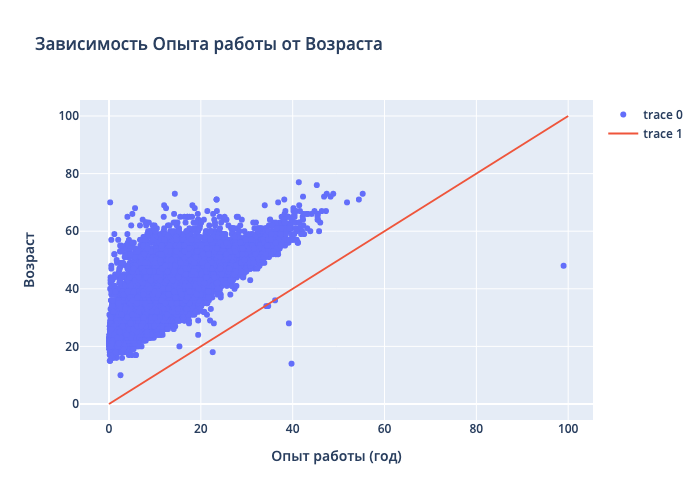

In [159]:
layout = dict(xaxis=dict(title='Опыт работы (год)'), yaxis=dict(title='Возраст'))
fig = go.Figure(layout=layout)
fig.add_trace(go.Scatter(
    x = scatter_data['Опыт работы (год)'],
    y = scatter_data['Возраст'],
    mode='markers'
))
fig.add_trace(go.Scatter(
    x=[0, 100],
    y=[0, 100],
    mode='lines'
))
fig.update_layout(title='Зависимость Опыта работы от Возраста')
fig.show()

На данном графие очень четко видны аномалии данных: это все значения которые расположении на красной линии и ниже ее. Так как не может быть опыть равным возрасту соискателя и даже выше возраста в том числе. 

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


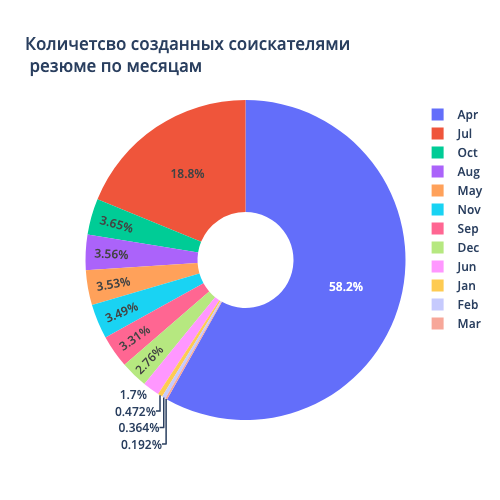

In [160]:
scatter_data['Обновление резюме'] = pd.to_datetime(merged['Обновление резюме'])
# scatter_data.info()

scatter_data['Month'] = scatter_data['Обновление резюме'].dt.month
line_data = scatter_data.groupby('Month', as_index=False)['Обновление резюме'].count()
line_data.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig = px.pie(
    line_data, 
    values = 'Обновление резюме', 
    names = line_data.index, 
    title='Количетсво созданных соискателями <br> резюме по месяцам', 
    hole = 0.3, 
    width = 500
    )

fig.show()

Из данной диаграммы мы видим, что 58% соискателей обновили свое резюме в апреле месяце. Из этого можем сделать вывод, что апрель самый активный месяц для поиска работы. В три разаме меньше и 2й по графику у нас идет месяц июль по кол-ву обновленных соискателями резюме. 

In [161]:
mask = scatter_data['Ищет работу на должность:'].value_counts().iloc[:10]
vac_list = mask.index.to_list()
top_vacancies = scatter_data['Ищет работу на должность:'].isin(vac_list)
top_vac_data = scatter_data[top_vacancies]
table = pd.pivot_table(
    top_vac_data,
    index = 'Ищет работу на должность:',
    columns = 'Город',
    values = 'ЗП (руб)',
    aggfunc = 'median',
    fill_value=0
)
salary_vac = top_vac_data.groupby('Ищет работу на должность:', as_index=False)['ЗП (руб)'].median()



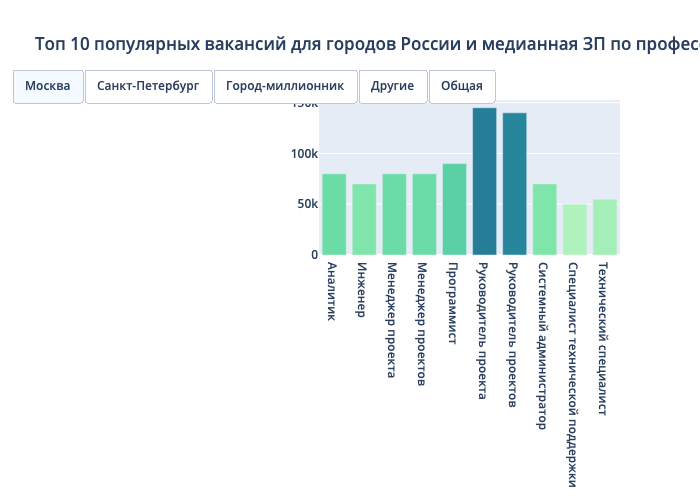

In [162]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x = table.index,
    y = table['Москва'],
    name= 'Москва',
    marker={'color': table['Москва'],'colorscale': 'tealgrn'}
))

fig.add_trace(go.Bar(
    x = table.index,
    y = table['Санкт-Петербург'],
    name= 'Санкт-Петербург',
    marker={'color': table['Санкт-Петербург'],'colorscale': 'tealgrn'},
    visible=False
))

fig.add_trace(go.Bar(
    x = table.index,
    y = table['город-миллионник'],
    name= 'город-миллионник',
    marker={'color': table['город-миллионник'],'colorscale': 'tealgrn'},
    visible=False
))

fig.add_trace(go.Bar(
    x = table.index,
    y = table['другие'],
    name= 'другие',
    marker={'color': table['другие'],'colorscale': 'tealgrn'},
    visible=False
))

fig.add_trace(go.Bar(
    x = salary_vac['Ищет работу на должность:'],
    y = salary_vac['ЗП (руб)'],
    name= 'Общее',
    marker={'color': salary_vac['ЗП (руб)'],'colorscale': 'tealgrn'},
    visible=False
))

buttons = []
cities = ['Москва', 'Санкт-Петербург', 'Город-миллионник', 'Другие', 'Общая']
for i, city in enumerate(cities):
    buttons.append(dict(
        label=city,
        method="update",
        args=[{"visible": [False] * i + [True] + [False] * (3-i+1)},
              {"title": f"Топ 10 популярных вакансий для {city} и медианная ЗП по профессии"}]
    ))
    
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.59,
            y=1.2,
            buttons=buttons,
        )
    ])

fig.update_layout(
    title_text="Топ 10 популярных вакансий для городов России и медианная ЗП по профессии",
    xaxis_domain=[0.02, 1.0]
)
fig.show()

Выводы к таблице выше:
Из данной таблицы мы видим 10 самых популярных вакансий в России и также в разбивке по крупным городам и уровню ЗП. Также мы видим что у нас в таблице присутствуют дубликаты наименования вакансий Руководитель проета и менеджер проекте. Нужно во время чистки данных обратить внимание на дубли в этой категории и сгруппировать их из 2 категории дублкикатов по наименованиям в одну. 

Также мы видим что самая высокооплачиваемая профессия в Росиии и отдельно по городах это Руководитель проекта. На 2м месте менеджер проекта, в Москве 2е место занял програмист. 

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [163]:
print(merged.duplicated().sum())
merged.drop_duplicates(inplace=True)


161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [164]:
cols_null_percent = merged.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)
cols_with_null

Опыт работы (месяц)                0.376825
Последняя/нынешняя должность       0.004486
Последнее/нынешнее место работы    0.002243
dtype: float64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [165]:
values = {'Опыт работы (месяц)': merged['Опыт работы (месяц)'].median()}
merged = merged.dropna(subset=['Последняя/нынешняя должность', 'Последнее/нынешнее место работы'])
merged = merged.fillna(values)
merged['Опыт работы (месяц)'].mean()


114.35777573405711

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [166]:
outlier =  merged[(merged['ЗП (руб)'] > 1e6) | (merged['ЗП (руб)'] < 1000)]
merged = merged.drop(outlier.index, axis=0)

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [167]:
outlier_age = merged[(merged['Опыт работы (месяц)'] / 12) > merged['Возраст']]
merged = merged.drop(outlier_age.index)

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**? В какую сторону **асимметрично логарифмическое распределение**? Найдите выбросы с помощью **метода z-отклонения** и удалите их из данных, используйте логарифмический масштаб, сделайте **послабление на 1 сигму (возьмите 4 сигмы)** в сторону, противоположную асимметрии. 

Text(0.5, 1.0, 'Распределение возраста в логарифмическом масштабе')

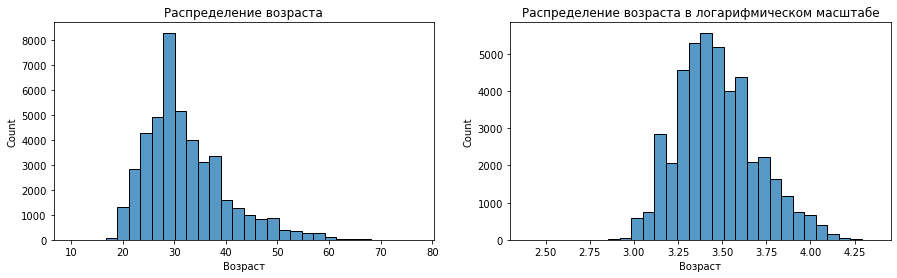

In [168]:
merged['Возраст']

fig, axes = plt.subplots(1,2, figsize=(15,4))
histplot = sns.histplot(merged['Возраст'], bins=30, ax=axes[0])
histplot.set_title('Распределение возраста')

# fig = plt.figure(figsize=(10, 7))
log_age = np.log(merged['Возраст']+1)
histplot = sns.histplot(log_age, bins=30, ax=axes[1])
histplot.set_title('Распределение возраста в логарифмическом масштабе')



Исходя из правого графика распределение имеет правосторонню ассиметрию, так как справа от моды наблюдается чуть более налюдений. 

In [169]:
def outliers_z_score(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else: 
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(merged, 'Возраст', left=3, right=4, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482


In [170]:
# outliers['Опыт работы (месяц)'] = outliers['Опыт работы (месяц)'] / 12
outliers

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,гибкий график,частичная занятость,полный день,проектная работа,сменный график,стажировка,вахтовый метод,волонтерство,удаленная работа,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-06-04,Не указано,Среднее,M,15,2.0,Санкт-Петербург,...,True,True,False,False,True,False,False,False,True,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-09-04,Не указано,Среднее специальное,M,15,3.0,другие,...,False,False,True,False,False,False,False,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,M,10,30.0,Санкт-Петербург,...,True,True,True,True,False,True,False,False,True,60000.0
